### Project and dataset description

### Load data

In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
Twitter_airline = pd.read_csv("Tweets.csv") 


In [5]:
Twitter_airline.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
Twitter_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
Twitter_airline.describe(include="all")

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


### Basic Cleaning (NA, duplicates, text length) 

In [8]:
Twitter_airline.drop_duplicates(subset=['text'], inplace=True)

In [10]:
Twitter_airline.isna()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,False,False,False,True,True,False,True,False,True,False,False,True,False,True,False
1,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False
2,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
4,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,False,False,False,True,False,False,True,False,True,False,False,True,False,True,True
14636,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True
14637,False,False,False,True,True,False,True,False,True,False,False,True,False,False,True
14638,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False


In [12]:
Twitter_airline = Twitter_airline.dropna(subset=['text'])

In [13]:
Twitter_airline = Twitter_airline[Twitter_airline['text'].str.strip() != '']

In [14]:
Twitter_airline.isna()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,False,False,False,True,True,False,True,False,True,False,False,True,False,True,False
1,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False
2,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
4,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,False,False,False,True,False,False,True,False,True,False,False,True,False,True,True
14636,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True
14637,False,False,False,True,True,False,True,False,True,False,False,True,False,False,True
14638,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False


### Sentiment by airline

In [15]:
Twitter_airline['airline_sentiment'].value_counts(normalize=False)

airline_sentiment
negative    9080
neutral     3057
positive    2290
Name: count, dtype: int64

In [16]:
Twitter_airline['airline_sentiment'].value_counts(normalize=True)

airline_sentiment
negative    0.629375
neutral     0.211894
positive    0.158730
Name: proportion, dtype: float64

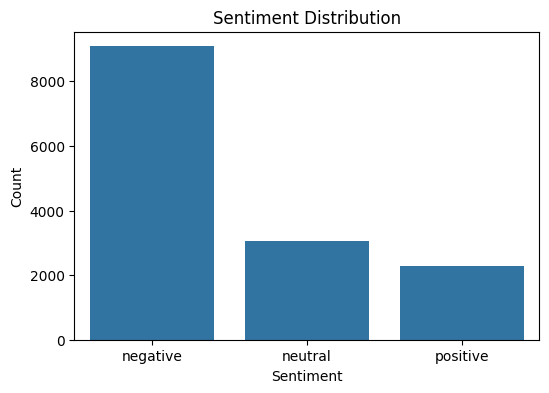

In [18]:
# Plotting the counts per sentiment
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='airline_sentiment', data=Twitter_airline, order=Twitter_airline['airline_sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [19]:
airline_sent = Twitter_airline.groupby(['airline', 'airline_sentiment']).size().reset_index(name='count')


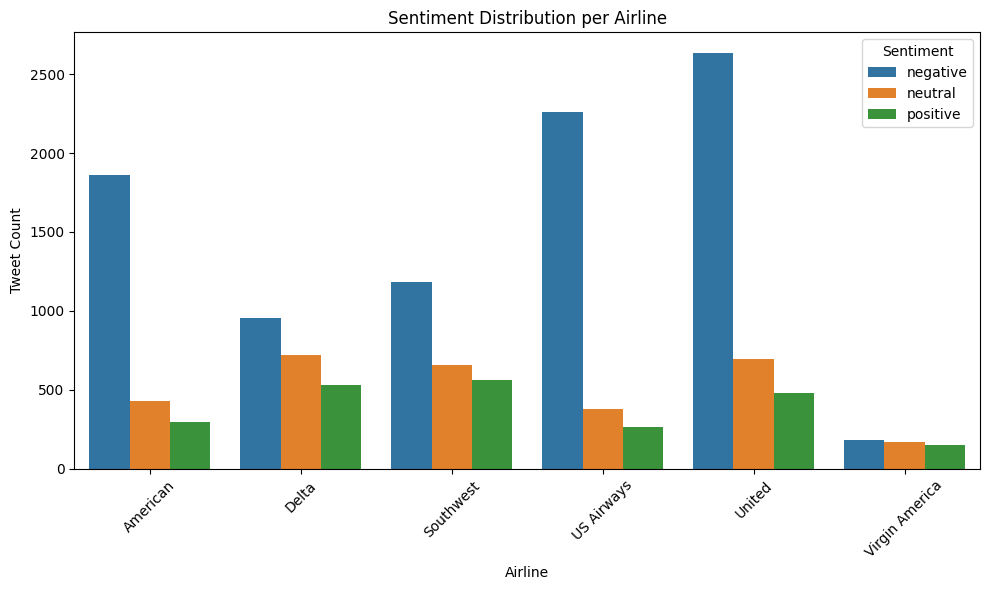

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by airline and sentiment
airline_sent = Twitter_airline.groupby(['airline', 'airline_sentiment']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(
    data=airline_sent,
    x='airline',
    y='count',
    hue='airline_sentiment'
)

plt.title('Sentiment Distribution per Airline')
plt.xlabel('Airline')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Negative reasons analysis

In [21]:
neg = Twitter_airline[Twitter_airline['airline_sentiment'] == 'negative']
neg['negativereason'].value_counts()


negativereason
Customer Service Issue         2883
Late Flight                    1650
Can't Tell                     1176
Cancelled Flight                829
Lost Luggage                    719
Bad Flight                      575
Flight Booking Problems         523
Flight Attendant Complaints     475
longlines                       177
Damaged Luggage                  73
Name: count, dtype: int64

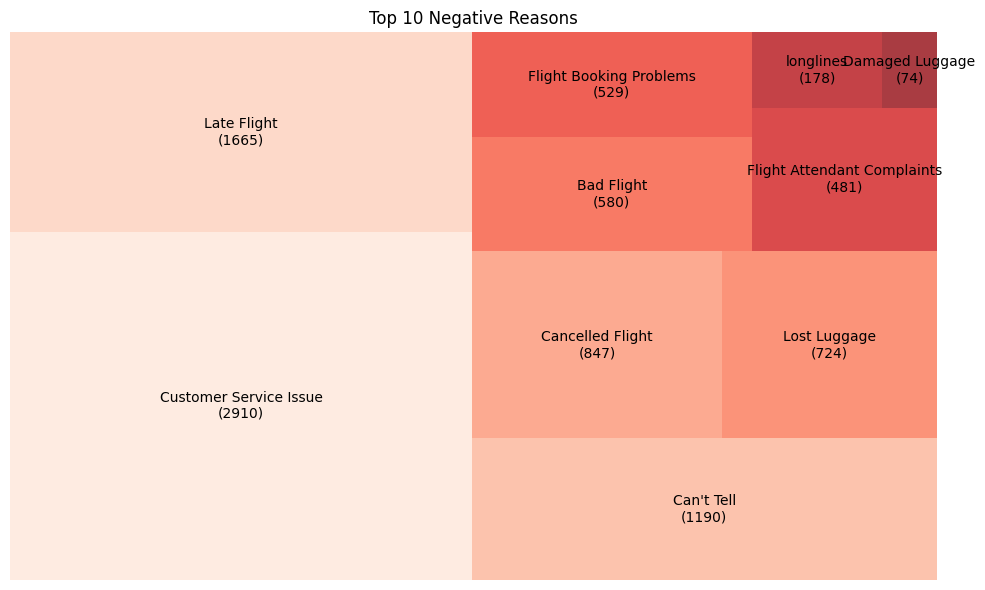

In [26]:
import matplotlib.pyplot as plt
import squarify  # type: ignore

neg = df[df['airline_sentiment'] == 'negative'].copy()
neg = neg.dropna(subset=['negativereason'])

top_reasons = (
    neg['negativereason']
    .value_counts()
    .head(10)
    .reset_index()
)
top_reasons.columns = ['negativereason', 'count']

sizes = top_reasons['count'].values
labels = [f"{r}\n({c})" for r, c in zip(top_reasons['negativereason'], top_reasons['count'])]

plt.figure(figsize=(10,6))
squarify.plot(
    sizes=sizes,
    label=labels,
    alpha=0.8,
    color=sns.color_palette('Reds', n_colors=len(sizes))
)
plt.axis('off')
plt.title('Top 10 Negative Reasons')
plt.tight_layout()
plt.show()


### Text length and basic word frequency

In [28]:
# Add text length (number of characters)
Twitter_airline['text_length'] = Twitter_airline['text'].str.len()

Twitter_airline[['text', 'text_length']].tail()


,text,text_length
14635,@AmericanAir thank you we got on a different f...,63
14636,@AmericanAir leaving over 20 minutes Late Flig...,150
14637,@AmericanAir Please bring American Airlines to...,60
14638,"@AmericanAir you have my money, you change my ...",135
14639,@AmericanAir we have 8 ppl so we need 2 know h...,138


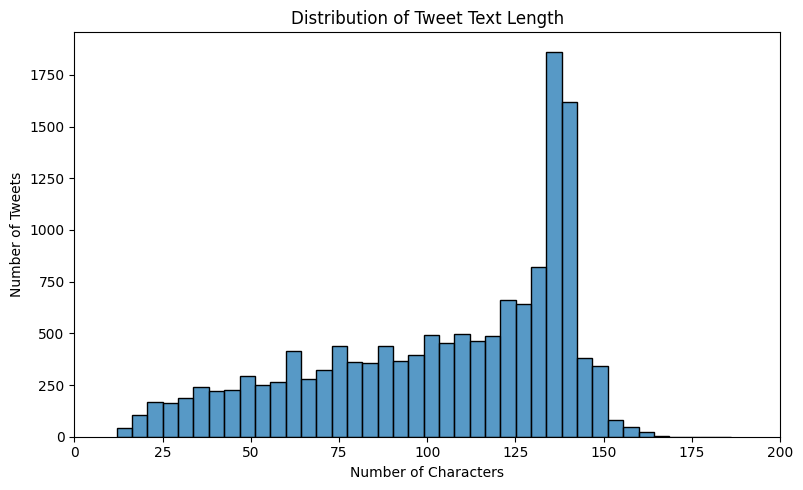

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(Twitter_airline['text_length'], bins=40, kde=False)
plt.title('Distribution of Tweet Text Length')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.xlim(0, 200)
plt.show()


In [32]:
# The most common words per sentiment

import re
from collections import Counter

def simple_tokenize(text):
    # lower, remove URLs/mentions, keep words only
    text = text.lower()
    text = re.sub(r"http\S+", "", text)        # URLs
    text = re.sub(r"@\w+", "", text)          # @mentions
    text = re.sub(r"[^a-z0-9# ]", " ", text)  # keep letters, digits, hashtags, spaces
    tokens = text.split()
    return [t for t in tokens if len(t) > 2]  # drop very short tokens

def top_words_for_sentiment(df, sentiment, n=15):
    subset = df[df['airline_sentiment'] == sentiment]
    all_tokens = []
    for t in subset['text']:
        all_tokens.extend(simple_tokenize(t))
    counter = Counter(all_tokens)
    return counter.most_common(n)

# Example: top 15 words for each class
top_neg = top_words_for_sentiment(df, 'negative', n=15)
top_neu = top_words_for_sentiment(df, 'neutral', n=15)
top_pos = top_words_for_sentiment(df, 'positive', n=15)

print("Top negative words:", top_neg)
print("Top neutral words:", top_neu)
print("Top positive words:", top_pos)


Top negative words: [('the', 4114), ('flight', 2937), ('and', 2825), ('you', 2722), ('for', 2714), ('not', 1355), ('your', 1352), ('that', 1294), ('was', 1209), ('have', 1202), ('can', 1082), ('with', 1072), ('this', 1011), ('get', 988), ('but', 963)]
Top neutral words: [('the', 975), ('you', 766), ('for', 615), ('flight', 609), ('can', 474), ('and', 457), ('from', 331), ('have', 301), ('that', 261), ('with', 250), ('get', 238), ('will', 217), ('this', 210), ('are', 199), ('what', 187)]
Top positive words: [('the', 972), ('you', 913), ('for', 670), ('thanks', 608), ('thank', 455), ('and', 451), ('flight', 378), ('was', 239), ('your', 237), ('great', 236), ('with', 201), ('that', 179), ('just', 179), ('this', 172), ('service', 161)]


In [33]:
def extract_hashtags(text):
    return re.findall(r"#\w+", text.lower())

def top_hashtags_for_sentiment(df, sentiment, n=10):
    subset = df[df['airline_sentiment'] == sentiment]
    all_tags = []
    for t in subset['text']:
        all_tags.extend(extract_hashtags(t))
    counter = Counter(all_tags)
    return counter.most_common(n)

print("Top negative hashtags:", top_hashtags_for_sentiment(df, 'negative', 10))
print("Top neutral hashtags:", top_hashtags_for_sentiment(df, 'neutral', 10))
print("Top positive hashtags:", top_hashtags_for_sentiment(df, 'positive', 10))


Top negative hashtags: [('#fail', 69), ('#unitedairlines', 37), ('#jetblue', 31), ('#usairways', 28), ('#customerservice', 27), ('#neveragain', 27), ('#disappointed', 24), ('#usairwaysfail', 24), ('#united', 22), ('#americanairlines', 22)]
Top neutral hashtags: [('#destinationdragons', 50), ('#avgeek', 19), ('#flyingitforward', 11), ('#travel', 9), ('#b737', 6), ('#lufthansa', 6), ('#flights', 5), ('#flight', 5), ('#jfk', 4), ('#unitedairlines', 4)]
Top positive hashtags: [('#destinationdragons', 21), ('#jetblue', 15), ('#customerservice', 9), ('#flyfi', 9), ('#travel', 8), ('#thankyou', 6), ('#mint', 5), ('#boston', 4), ('#22', 4), ('#unitedairlines', 4)]


### EDA summary and modeling plan

#### Overall sentiment distribution
The dataset is heavily skewed towards negative sentiment, with negative tweets clearly outnumbering neutral and positive. This indicates that Twitter conversations about airlines in this sample are dominated by complaints rather than praise or neutral mentions.

#### Sentiment by airline
Across all airlines, negative sentiment is the majority class, but the magnitude varies by carrier. Some airlines (e.g., American, United, US Airways) show a particularly high volume of negative tweets relative to neutral and positive ones, while smaller carriers like Virgin America have far fewer tweets overall. This suggests both brand size and service issues shape the volume and tone of customer feedback.

#### Top negative reasons (treemap)

The treemap of negative reasons shows that a few complaint categories dominate:
1. Customer service issues and late flights are the largest blocks, indicating serivce quality and delays are the main pain points.
2. Other frequent reasons include cancelled flights, lost luggage, bad flights, and flight bookinh problems

#### Tweet length distribution
Most tweets cluster between roughly 80–140 characters, with a sharp drop-off beyond that range, reflecting typical Twitter usage patterns. Very short tweets are less common, which suggests that most users provide at least a brief description of their experience rather than one‑word or very terse messages. This relatively consistent length distribution is useful when choosing maximum sequence length for NLP models.



#### Common words and hashtags by sentiment

The most frequent words in negative tweets include terms referring to delays, cancellations, and poor service, while positive tweets contain more appreciative language (e.g., thanks, great) and brand mentions. Hashtag analysis shows airline‑specific tags (e.g., carrier names) alongside complaint‑oriented tags like customer service and travel, which reinforces the narrative seen in the top negative reasons plot.

